# Task 2: Perform an Exploratory Data Analysis on a Given Dataset (5 marks)

## Exploratory Data Analysis (EDA)

In [1]:
!pip install pycaret[full] mlflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached antlr4_python3_runtime-4.11.1-py3-none-any.whl.metadata (291 bytes)
Using cached antlr4_python3_runtime-4.11.1-py3-none-any.whl (144 kB)
  Attempting uninstall: antlr4-python3-runtime
    Found existing installation: antlr4-python3-runtime 4.9.3
    Uninstalling antlr4-python3-runtime-4.9.3:
      Successfully uninstalled antlr4-python3-runtime-4.9.3


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hydra-core 1.3.2 requires antlr4-python3-runtime==4.9.*, but you have antlr4-python3-runtime 4.11.1 which is incompatible.
omegaconf 2.3.0 requires antlr4-python3-runtime==4.9.*, but you have antlr4-python3-runtime 4.11.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
from pycaret.classification import *
import mlflow
from flask import Flask, request, render_template
from pycaret.classification import load_model, predict_model

In [3]:
# Load the dataset
file_path = 'data/02_mushroom_species_data.csv'
df = pd.read_csv(file_path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,7932
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,6
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,6256,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


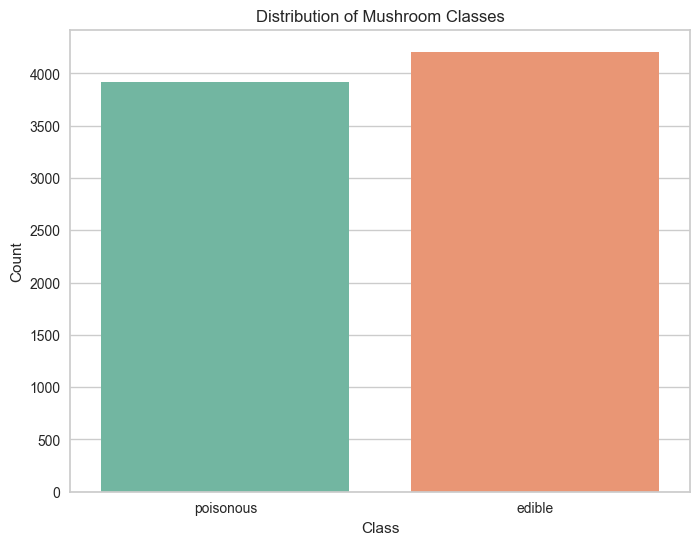

In [6]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', palette='Set2')
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The bar chart shows the distribution of mushroom classes in the dataset, with two categories: "poisonous" and "edible." The chart reveals that the dataset is relatively balanced, with a slightly higher number of edible mushrooms compared to poisonous ones. There are approximately 4,000 edible mushrooms and slightly fewer than 4,000 poisonous mushrooms. 

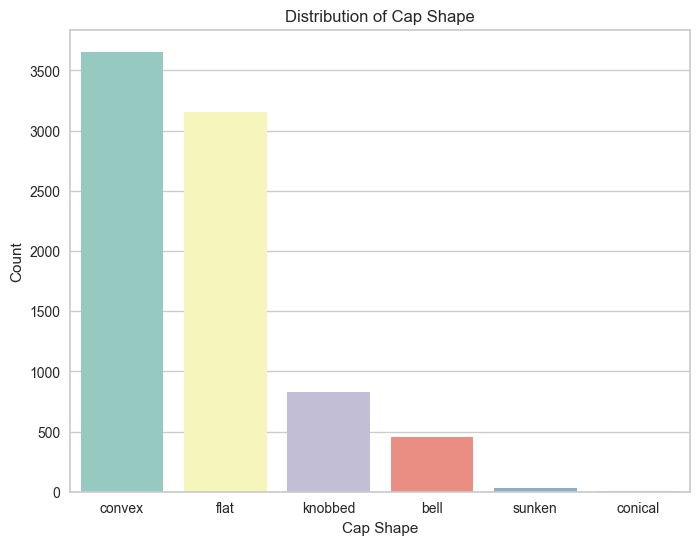

In [7]:
# Sort the cap-shape categories by their count
cap_shape_order = df['cap-shape'].value_counts().index

# Plot the distribution of cap-shape sorted by count
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cap-shape', order=cap_shape_order, palette='Set3')
plt.title('Distribution of Cap Shape')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.show()

The bar chart illustrates the distribution of different cap shapes among mushrooms in the dataset. The most common cap shape is "convex," with around 3,500 occurrences, followed by "flat," which appears slightly less frequently, with about 3,000 instances. The "knobbed" and "bell" shapes are less common, with fewer than 1,000 occurrences each. The "sunken" and "conical" shapes are the rarest, appearing very infrequently in the dataset. This distribution suggests that the convex and flat cap shapes dominate the dataset, while other shapes are relatively rare. 

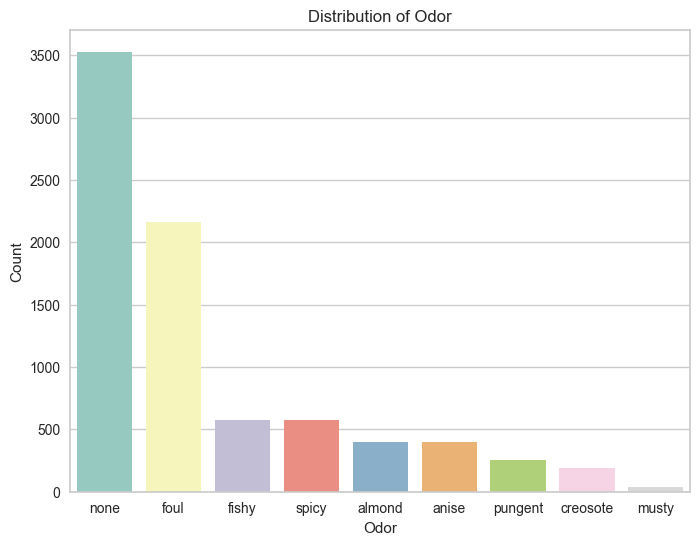

In [8]:
# Sort the odor categories by their count
odor_order = df['odor'].value_counts().index

# Plot the distribution of odor sorted by count
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='odor', order=odor_order, palette='Set3')
plt.title('Distribution of Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

The bar chart illustrates the distribution of different odors among mushrooms in the dataset. The majority of mushrooms have no detectable odor, as indicated by the "none" category, which dominates the chart with around 3,500 instances. The second most common odor is "foul," with approximately 2,000 occurrences. The other odor types, such as "fishy," "spicy," "almond," "anise," "pungent," "creosote," and "musty," are much less common, each having fewer than 500 occurrences. This distribution shows a significant concentration of mushrooms with no odor, while the presence of other odors is relatively rare.

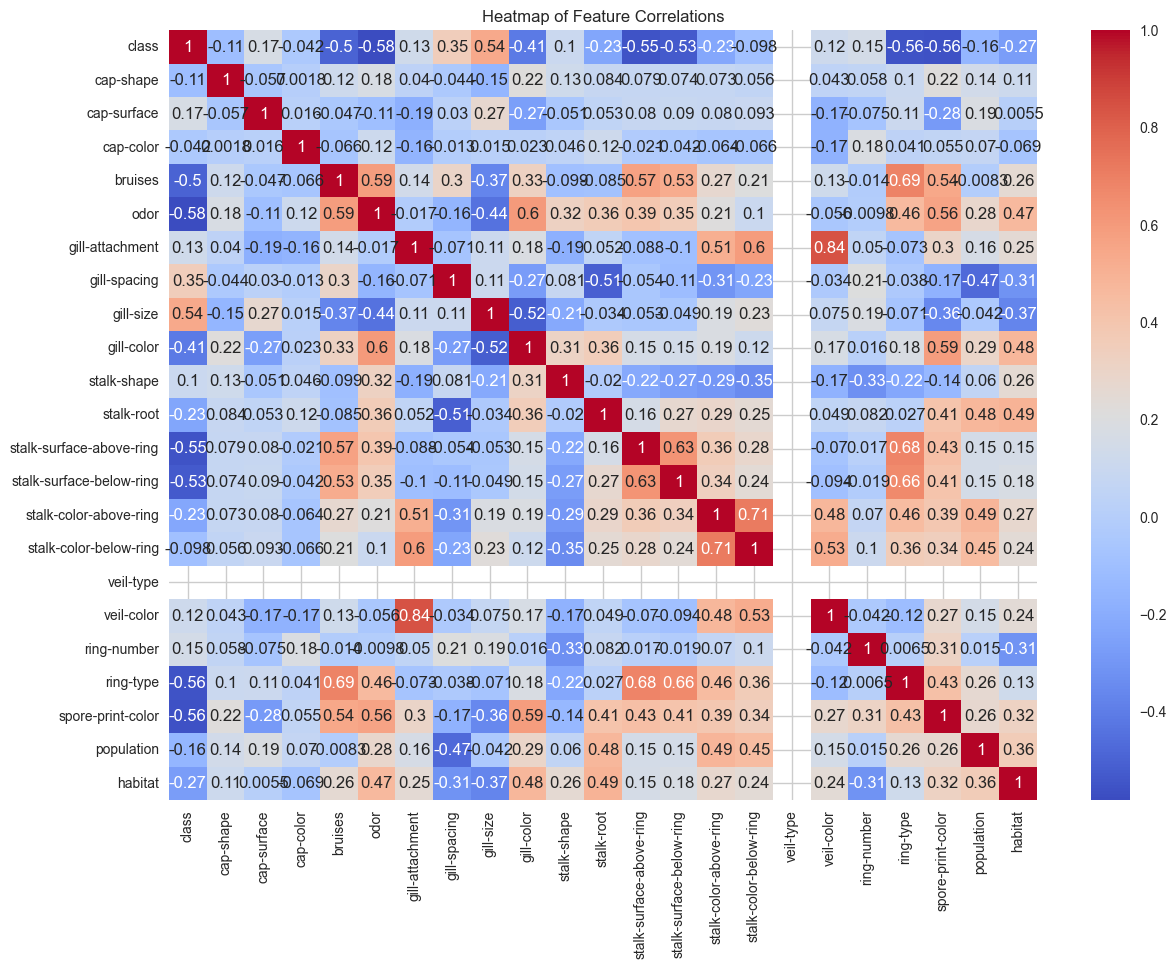

In [9]:
# Create a heatmap of the correlations between categorical features
plt.figure(figsize=(14, 10))
sns.heatmap(df.apply(lambda x: pd.factorize(x)[0]).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()



The heatmap displays the correlations between various features in the mushroom dataset. Each cell in the heatmap represents the correlation coefficient between two features, with positive correlations shown in red and negative correlations in blue. Strong positive correlations are observed between certain pairs of features, such as "veil-type" and "veil-color," as well as "stalk-surface-above-ring" and "stalk-surface-below-ring," indicating that these features tend to increase together. Conversely, strong negative correlations are seen between features like "gill-size" and "gill-spacing," where one tends to decrease as the other increases. The feature "class" (which likely indicates whether a mushroom is edible or poisonous) shows moderate correlations with several features, such as "gill-size" and "odor," suggesting these may be influential factors in determining the class of a mushroom. 

# Task 2: Train, validate and develop a Machine Learning pipeline using PyCaret. (10 marks)

In [10]:
from pycaret.classification import *

# Specify the categorical features explicitly, excluding the target column
categorical_features = df.columns.drop('class').tolist()

# Initialize the PyCaret environment
clf1 = setup(data=df, 
             target='class', 
             categorical_features=categorical_features, 
             session_id=123)

# Train multiple models using k-fold cross-validation
best_model = compare_models()


,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(8124, 111)"
6,Transformed train set shape,"(5686, 111)"
7,Transformed test set shape,"(2438, 111)"
8,Categorical features,22
9,Rows with missing values,2.4%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.3010
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4660
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3380
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5160
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4430
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0230
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9996,0.9996,0.2900
ada,Ada Boost Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.5150
catboost,CatBoost Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,2.1090
ridge,Ridge Classifier,0.9996,1.0000,0.9996,0.9996,0.9996,0.9993,0.9993,0.3180


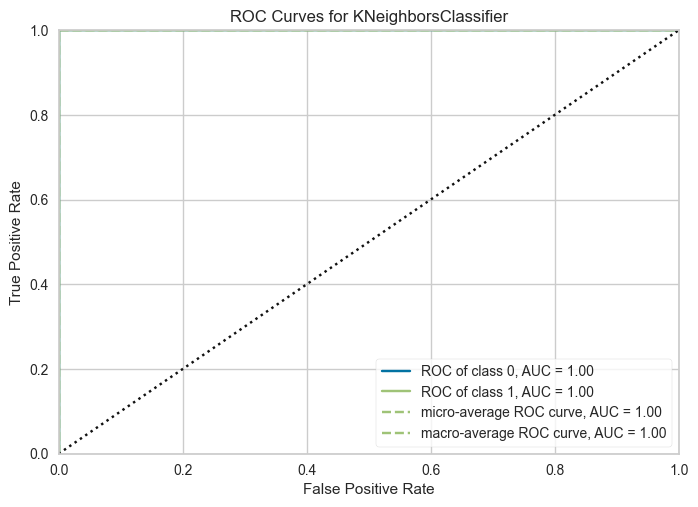

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
# Analyze the performance of the trained model on the test set
plot_model(best_model, plot='auc')
evaluate_model(best_model)

In [12]:
# Finalize the best model
final_model = finalize_model(best_model)
# Predict resale prices on new data (you can use a test dataset or the same dataset)
predictions = predict_model(final_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [13]:
from pycaret.classification import save_model

# Assuming your model is named 'final_model'
save_model(final_model, 'models/mushroom_classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                                               return_df=True,
                                                               use_cat_n

In [14]:
# load pipeline
loaded_best_pipeline = load_model('models/mushroom_classification_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\USER\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              m...
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

# Task 3: Build and deploy a front-end web application with real-time prediction (15 marks)

In [15]:
pip install flask pycaret pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Initialize Flask app
app = Flask(__name__)
# Load the trained model
model = load_model('models/mushroom_classification_model')

# Define the home route
@app.route('/')
def home():
    return render_template('templates/jess.html')

Transformation Pipeline and Model Successfully Loaded


In [17]:
# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the form
    input_data = {
        'cap-shape': request.form.get('cap_shape', ''),
        'cap-surface': request.form.get('cap_surface', ''),
        'cap-color': request.form.get('cap_color', ''),
        'bruises': request.form.get('bruises', ''),  # Use get to avoid KeyError
        'odor': request.form.get('odor', ''),
        'gill-attachment': request.form.get('gill_attachment', ''),
        'gill-spacing': request.form.get('gill_spacing', ''),
        'gill-size': request.form.get('gill_size', ''),
        'gill-color': request.form.get('gill_color', ''),
        'stalk-shape': request.form.get('stalk_shape', ''),
        'stalk-root': request.form.get('stalk_root', ''),
        'stalk-surface-above-ring': request.form.get('stalk_surface_above_ring', ''),
        'stalk-surface-below-ring': request.form.get('stalk_surface_below_ring', ''),
        'stalk-color-above-ring': request.form.get('stalk_color_above_ring', ''),
        'stalk-color-below-ring': request.form.get('stalk_color_below_ring', ''),
        'veil-type': request.form.get('veil_type', ''),
        'veil-color': request.form.get('veil_color', ''),
        'ring-number': request.form.get('ring_number', ''),
        'ring-type': request.form.get('ring_type', ''),
        'spore-print-color': request.form.get('spore_print_color', ''),
        'population': request.form.get('population', ''),
        'habitat': request.form.get('habitat', '')
    }

    # Convert the input data into a DataFrame
    input_df = pd.DataFrame([input_data])

    # Generate predictions
    predictions = predict_model(model, data=input_df)
    prediction = predictions['prediction_label'][0]

    # Return the result
    return render_template('templates/jess.html', prediction=prediction)

In [18]:
# Run the app
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8080, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.1.121:8080
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [19]:
try:
    model = load_model('models/mushroom_classification_model')
except Exception as e:
    print(f"Error loading model: {e}")
    raise

Transformation Pipeline and Model Successfully Loaded


In [20]:
predictions

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,partial,white,one,pendant,black,scattered,urban,poisonous,poisonous,1.0
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,partial,white,one,pendant,brown,numerous,grasses,edible,edible,1.0
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,partial,white,one,pendant,brown,numerous,meadows,edible,edible,1.0
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,partial,white,one,pendant,black,scattered,urban,poisonous,poisonous,1.0
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,partial,white,one,evanescent,brown,abundant,grasses,edible,edible,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,partial,orange,one,pendant,buff,clustered,leaves,edible,edible,1.0
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,partial,brown,one,pendant,buff,several,leaves,edible,edible,1.0
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,...,partial,orange,one,pendant,buff,clustered,leaves,edible,edible,1.0
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,partial,white,one,evanescent,white,several,leaves,poisonous,poisonous,1.0


In [21]:
# Loop through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}' column:")
    print(unique_values)
    print()  # Print a blank line for better readability

Unique values in 'class' column:
['poisonous' 'edible']

Unique values in 'cap-shape' column:
['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']

Unique values in 'cap-surface' column:
['smooth' 'scaly' 'fibrous' 'grooves']

Unique values in 'cap-color' column:
['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']

Unique values in 'bruises' column:
['bruises' 'no']

Unique values in 'odor' column:
['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']

Unique values in 'gill-attachment' column:
['free' 'attached']

Unique values in 'gill-spacing' column:
['close' 'crowded']

Unique values in 'gill-size' column:
['narrow' 'broad']

Unique values in 'gill-color' column:
['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']

Unique values in 'stalk-shape' column:
['enlarging' 'tapering']

Unique values in 'stalk-root' column:
['equal' 'club' 'bulbous' 'rooted']

Unique values in 'stalk-